In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(123)
tf.set_random_seed(123)

#データの準備
mnist = datasets.mnist
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = (x_train.reshape(-1, 784) / 255).astype(np.float32)
x_test = (x_test.reshape(-1, 784) / 255).astype(np.float32)
# t_train = np.eye(10)[t_train].astype(np.float32)
# t_test = np.eye(10)[t_test].astype(np.float32)
x_train, x_val, t_train, t_val = train_test_split(x_train, t_train, 
                                                  test_size = 0.2)


#モデルの構築
model = Sequential()
model.add(Dense(100, kernel_initializer = "he_normal"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))

model = Sequential()
model.add(Dense(100, kernel_initializer = "he_normal"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(10, activation = "softmax"))



#モデルの学習
model.compile(optimizer = "sgd", loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

es = EarlyStopping(monitor = "val_loss", patience = 5, verbose = 1)

hist = model.fit(x_train, t_train, epochs = 1000, batch_size = 100, 
                 verbose = 2, validation_data = (x_val, t_val),
                 callbacks = [es])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 48000 samples, validate on 12000 samples
Epoch 1/1000
48000/48000 - 1s - loss: 1.0095 - acc: 0.6815 - val_loss: 0.4838 - val_acc: 0.8745
Epoch 2/1000
48000/48000 - 1s - loss: 0.5838 - acc: 0.8260 - val_loss: 0.3810 - val_acc: 0.8982
Epoch 3/1000
48000/48000 - 1s - loss: 0.5065 - acc: 0.8484 - val_loss: 0.3345 - val_acc: 0.9082
Epoch 4/1000
48000/48000 - 1s - loss: 0.4595 - acc: 0.8642 - val_loss: 0.3079 - val_acc: 0.9151
Epoch 5/1000
48000/48000 - 1s - loss: 0.4305 - acc: 0.8728 - val_loss: 0.2893 - val_acc: 0.9187
Epoch 6/1000
48000/48000 - 1s - loss: 0.4053 - acc: 0.8792 - val_loss: 0.2741 - val_acc: 0.9218
Epoch 7/1000
48000/48000 - 1s - loss: 0.3861 - acc: 0.8854 - val_loss: 0.2628 - val_acc: 0.9249
Epoch 8/1000
48000/48000 - 1s - loss: 0.3719 - acc: 0.8900 - val_loss: 0.2524 - val_acc: 0.9275
Epoch 9/1000
48000/48000 - 1s - loss: 0.3625 - acc: 0.8912 - val_loss: 0.2449 - val_acc: 0.9297
Epoch

48000/48000 - 1s - loss: 0.1797 - acc: 0.9461 - val_loss: 0.1253 - val_acc: 0.9634
Epoch 82/1000
48000/48000 - 1s - loss: 0.1764 - acc: 0.9479 - val_loss: 0.1245 - val_acc: 0.9637
Epoch 83/1000
48000/48000 - 1s - loss: 0.1786 - acc: 0.9476 - val_loss: 0.1244 - val_acc: 0.9637
Epoch 84/1000
48000/48000 - 1s - loss: 0.1760 - acc: 0.9463 - val_loss: 0.1235 - val_acc: 0.9646
Epoch 85/1000
48000/48000 - 1s - loss: 0.1796 - acc: 0.9462 - val_loss: 0.1228 - val_acc: 0.9645
Epoch 86/1000
48000/48000 - 1s - loss: 0.1752 - acc: 0.9485 - val_loss: 0.1221 - val_acc: 0.9652
Epoch 87/1000
48000/48000 - 1s - loss: 0.1762 - acc: 0.9465 - val_loss: 0.1216 - val_acc: 0.9650
Epoch 88/1000
48000/48000 - 1s - loss: 0.1736 - acc: 0.9482 - val_loss: 0.1219 - val_acc: 0.9645
Epoch 89/1000
48000/48000 - 1s - loss: 0.1737 - acc: 0.9474 - val_loss: 0.1215 - val_acc: 0.9643
Epoch 90/1000
48000/48000 - 1s - loss: 0.1737 - acc: 0.9476 - val_loss: 0.1210 - val_acc: 0.9652
Epoch 91/1000
48000/48000 - 1s - loss: 0.171

No handles with labels found to put in legend.


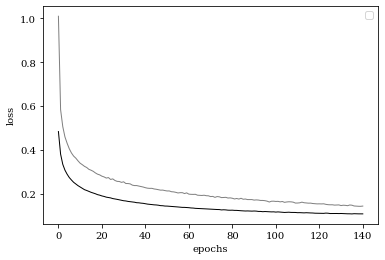

test_loss: 0.098, test_acc: 0.970


In [3]:
#モデルの評価
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

fig = plt.figure()
plt.rc("font", family = "serif")
plt.plot(range(len(loss)), loss, color = "gray", linewidth = 1)
plt.plot(range(len(val_loss)), val_loss, color = "black", linewidth = 1)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.savefig("output.jpg")
plt.show()

loss, acc = model.evaluate(x_test, t_test, verbose = 0)
print("test_loss: {:.3f}, test_acc: {:.3f}".format(loss, acc)) 